<a href="https://colab.research.google.com/github/anferivera/Metodos_Computacionales/blob/main/Lab_6_interpolation_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 6.1: Interpolation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

6.1  <font color='red'>     **Activity 1: Linear Interpolation** </font>
    
1.  In an Jupyter-notebook (colab), explore the behaviour of the Linear Interpolation algorithm when varying the number of data used.
2.  Construya la interpolación lineal para la función $f(x)=x^3$ en $x\, ϵ\, [-9,9]$

- - -

In [ ]:
#Linear Interpolating Function
def LinearInterpolator( x, Xn, Yn ):

    #Sorting data, in case they are not
    Yn = Yn[np.argsort(Xn)]
    Xn = Xn[np.argsort(Xn)]

    #Detecting size of x
    try:
        Ninter = len(x)
    except:
        Ninter = 1
        x = np.array([x,])

    #Constructing function for each iteration
    term = lambda x, i: (Yn[i+1] - Yn[i])/(Xn[i+1] - Xn[i])*(x - Xn[i]) + Yn[i]

    #Detecting intervals for each x, [x_i, x_i+1] and interpolating
    y = []
    for n in range(Ninter):
        for i in range(len(Xn)):
            if x[n] <= Xn[i]:
                break
        y.append( term(x[n],i-1) )

    return np.array(y)

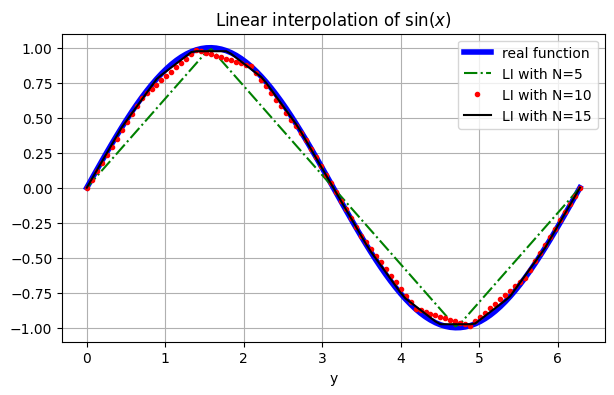

In [ ]:
#Function
def function(x):
    return np.sin(x)

#Number of intervals for data
Ndat = [5,10,15,20]
Xn5 = np.linspace( 0, 2*np.pi, Ndat[0] )
Yn5 = function(Xn5)
Xn10 = np.linspace( 0, 2*np.pi, Ndat[1] )
Yn10 = function(Xn10)
Xn15 = np.linspace( 0, 2*np.pi, Ndat[2] )
Yn15 = function(Xn15)

#Obtaining linear interpolation
Ninter = 100
x = np.linspace( 0, 2*np.pi, Ninter )
y5 = LinearInterpolator( x, Xn5, Yn5 )
y10 = LinearInterpolator( x, Xn10, Yn10 )
y15 = LinearInterpolator( x, Xn15, Yn15 )
f = function(x)

#Plotting
plt.figure( figsize=(7,4) )
plt.plot( x, f, color="blue", linewidth=4, label="real function" )
plt.plot( x, y5, 'g-.', label="LI with N=5" )
plt.plot( x, y10, 'r.', label="LI with N=10" )
plt.plot( x, y15, 'k-', label="LI with N=15" )

#Formatting
plt.legend()
plt.xlabel( "x" )
plt.xlabel( "y" )
#plt.ylim( (-1.5,1.5) )
plt.grid()
plt.title( "Linear interpolation of $\\sin(x)$" )
plt.show()

b) solution

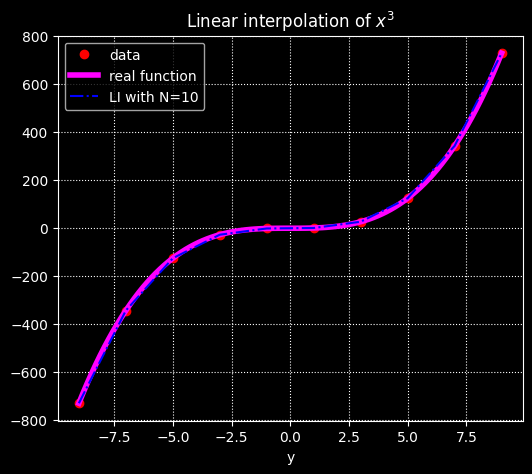

In [ ]:
#Function
def function(x):
    return x**3

#Number of intervals for data
Ndat = 10
Xn = np.linspace( -9, 9, Ndat )
Yn = function(Xn)

#Obtaining linear interpolation
Ninter = 100
x = np.linspace( -9, 9, Ninter )
y = LinearInterpolator( x, Xn, Yn )
f = function(x)

#Plotting
plt.style.use('dark_background')
plt.figure( figsize=(6,5) )
plt.plot( Xn, Yn, "o", color="red", label="data" )
plt.plot( x, f, color="magenta", linewidth=4, label="real function" )
plt.plot( x, y, 'b-.', label="LI with N=10" )

#Formatting
plt.legend()
plt.xlabel( "x" )
plt.xlabel( "y" )
#plt.ylim( (-1.5,1.5) )
plt.title( "Linear interpolation of $x^3$" )
plt.grid(linestyle = ':')
plt.show()

6.2 <font color='red'>     **Activity 2: Lagrange Interpolation** </font>

  Write your own implementation of the Lagrange interpolation algorithm during classtime.


$$P_n(x) = \sum_{i=0}^n f(x_i)L_{n,i}(x)$$


In [ ]:
import sympy as sp
from sympy import simplify

In [ ]:
#Variable
x = sp.Symbol('x')

#Polynomy Pn,i(x):
def Lni(i,Xn):

  num, den = 1 , 1
  for j in range(len(Xn)):
    #Do not take the i-esimo term
    if j != i:
      num *= (x-Xn[j])
      den *= (Xn[i]-Xn[j])
  return simplify(num/den)

#To manipulated the expresion
#t = sp.lambdify(x ,t)

#Lagrange Polynomial Pn(x)
def Pn(Xn,Yn):
  Pn = 0
  for i in range(len(Xn)):
    Pn += Yn[i]*Lni(i,Xn)
  return simplify(Pn)

**Example**:
Let's construc the Lagrange polynomial for $f(x)=x^3$ given the three points $[0,1,2]=[x_0,x_1,x_2]$.

In [ ]:
Xn=np.linspace(0,2,3)
Yn=Xn**3

Pn(Xn,Yn)

x*(3.0*x - 2.0)

In [ ]:
Xn=np.linspace(0,2,5)
Yn=Xn**3

Pn(Xn,Yn)

x**2*(-1.16573417585641e-15*x**2 + 1.0*x - 2.22044604925031e-15)

6.3 <font color='red'>     **Activity 3:** </font> LP

<div style="float: right;" markdown="1">
    <img src="http://universe-review.ca/I05-28-NGC7331.jpg">
</div>

One of the very first evidences of the existence of dark matter was the flat rotation curves of spiral galaxies. If we assume the total budget of mass of a galaxy is entirely made of luminous matter, the orbital circular velocity of stars around the galaxy plane should decay according to a keplerian potential. However this is not the case and the circular velocity barely decreases at larger radius, thus indicating the presence of a new non-visible matter component (dark matter). When it is necessary to determine how massive is the dark matter halo embedding a galaxy, an integration of the circular velocity is required. Nevertheless, due to the finite array of a CCD camera, only a discrete set of velocities can be measured and interpolation techniques are required.


In this activity we will take a discrete dataset of the circular velocity as a function of the radius for the galaxy [NGC 7331](http://es.wikipedia.org/wiki/NGC_7331) and perform both, a linear and a Lagrange interpolation. You can download the dataset from this [link](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/data/NGC7331.dat).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/data/NGC7331.dat'

df = pd.read_table(url, sep="\s+", header=None)
df.columns = ["radio","vel"]

df[:3]

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-756627744.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_table(url, sep="\s+", header=None)


,radio,vel
0,0.05,33.42496
1,0.10,71.70398
2,0.15,95.14708


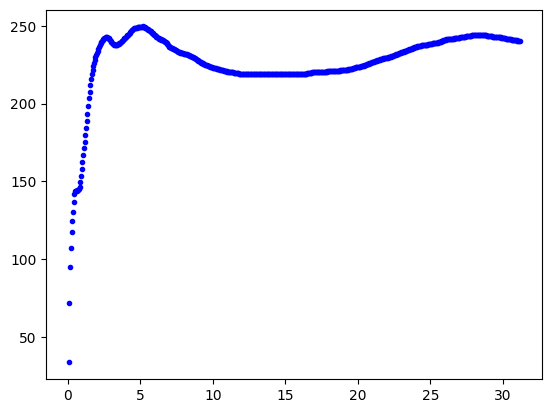

In [ ]:
plt.plot(df.radio, df.vel,'b.')

In [ ]:
x1 = df[50:51].radio.values[0]
y1 = df[50:51].vel.values[0]

print(x1,y1)

2.55 242.33159


## Linear Interpolation

In [ ]:
#Linear Interpolation data
x = np.linspace( 0.06 , df.radio.max(), 100 ) #Warning
y = LinearInterpolator( x, df.radio, df.vel )

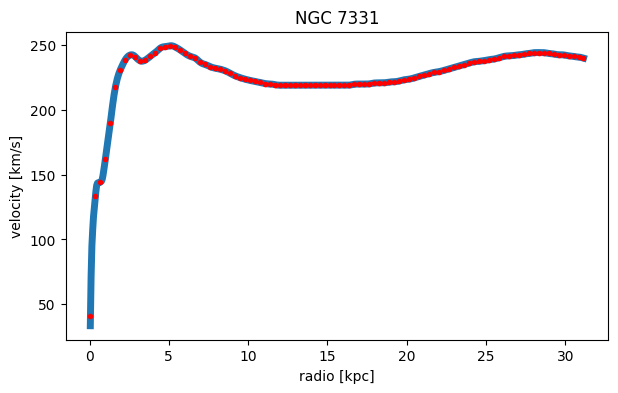

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(df.radio, df.vel, lw =5)
#Interpolation
plt.plot(x,y, 'r.')

plt.title('NGC 7331')
plt.ylabel('velocity [km/s]')
plt.xlabel('radio [kpc]')

plt.show()

## Lagrange interpolation

In [ ]:
from scipy.interpolate import lagrange #
from numpy.polynomial.polynomial import Polynomial # return the polinomial coeficients

In [ ]:
#arrar to choose the polynomial order
xLI = np.linspace( 0.06 , df.radio.max(), 7 )
xLI

array([ 0.06      ,  5.24166667, 10.42333333, 15.605     , 20.78666667,
       25.96833333, 31.15      ])

In [ ]:
#Tolerancia
epsilon = 0.05
#f(xLI)
p0 = df[np.logical_and(df.radio > xLI[0]- epsilon , df.radio < xLI[0]+ epsilon )][:1]
p1 = df[np.logical_and(df.radio > xLI[1]- epsilon , df.radio < xLI[1]+ epsilon )][:1]
p2 = df[np.logical_and(df.radio > xLI[2]- epsilon , df.radio < xLI[2]+ epsilon )][:1]
p3 = df[np.logical_and(df.radio > xLI[3]- epsilon , df.radio < xLI[3]+ epsilon )][:1]
p4 = df[np.logical_and(df.radio > xLI[4]- epsilon , df.radio < xLI[4]+ epsilon )][:1]
p5 = df[np.logical_and(df.radio > xLI[5]- epsilon , df.radio < xLI[5]+ epsilon )][:1]
p6 = df[np.logical_and(df.radio > xLI[6]- epsilon , df.radio < xLI[6]+ epsilon )][:1]

In [ ]:
yLI = [p0.vel.values[0],p1.vel.values[0],p2.vel.values[0],p3.vel.values[0],p4.vel.values[0],p5.vel.values[0],p6.vel.values[0]]

In [ ]:
#Lagrange interpolation
poly = lagrange(xLI, yLI)
print(poly)
#array to evaluated and plot the poly
x_new= np.linspace(0.06, df.radio.max(), 100)

            6            5          4         3         2
-2.386e-05 x + 0.002524 x - 0.1058 x + 2.222 x - 24.06 x + 121.1 x + 26.25


In [ ]:
#Check: Using my implementation of  the Lagrange Polynomial
Pn(xLI, yLI)

-2.38609079388032e-5*x**6 + 0.00252398860000064*x**5 - 0.105791439743612*x**4 + 2.22215037272975*x**3 - 24.0576859777719*x**2 + 121.071690724791*x + 26.2467876106475

In [ ]:
xLI

array([ 0.06      ,  5.24166667, 10.42333333, 15.605     , 20.78666667,
       25.96833333, 31.15      ])

In [ ]:
radio = df["radio"].values
vel = df["vel"].values

indices = np.linspace(0, len(df)-1, 8, dtype=int)
Xn = radio[indices]
Yn = vel[indices]

print("Puntos seleccionados para interpolar:")
for r, v in zip(Xn, Yn):
    print(f"r = {r:.2f}, v = {v:.2f}")

x = sp.Symbol('x')

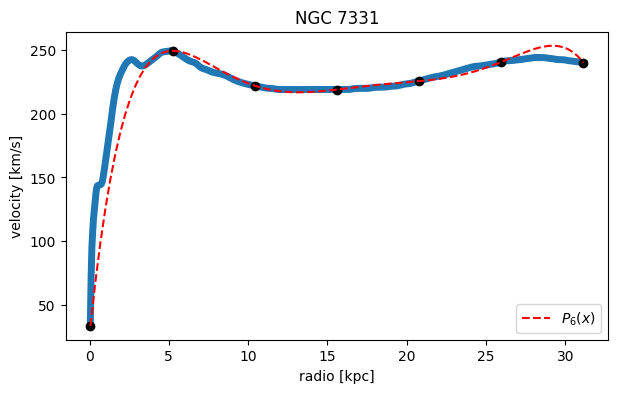

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(df.radio, df.vel, lw =5)
#Interpolation
plt.plot(xLI, yLI, 'ko')
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), 'r--',label=r'$P_6(x)$')

plt.title('NGC 7331')
plt.ylabel('velocity [km/s]')
plt.xlabel('radio [kpc]')
plt.legend()

plt.show()

6.4 <font color='red'>     **Activity 4: Divided difference** </font>
1.  Using the defined function for divided differences construc the $P_2(x)$ for $f(x)=x^3$, $x\, ϵ\, [0,2]$ given the three points $[0,1,2]=[x_0,x_1,x_2]$.
2.  Construc the $P_4(x)$ for $f(x)=x^3$, $x_i = [0,2]$ given the 5 points $[0,0.5,1,1.5,2]$.
3.  Show that both methods to calculate Lagrange interpolators are equivalents (opcional)...

$f(x)=x^3$, $xϵ [0,2]$ given the three points $[0,1,2]=[x_0,x_1,x_2]$. $f(x_i)=[0,1,8]$ *

We know that $P_2(x)=3x^2-2x+0,$

In [ ]:
#Construction of a kth divided difference (recursive code)
def D( i, k, Xn, Yn ):
    #If k+i>N
    if i+k>=len(Xn):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Yn[i]
    #If higher divided difference
    else:
        return (D(i+1, k-1, Xn, Yn)-D(i, k-1, Xn, Yn))/(Xn[i+k]-Xn[i])

1. Solution: $P_n(x) = D_0[x_0] + \sum_{k=1}^n D_k[x_0] (x-x_0) \cdots (x-x_{k-1})$

In [ ]:
import sympy as sp
from sympy import simplify

In [ ]:
Xn = np.array([0,1,2])
Yn = np.array([0,1,8])

D00 = D( Xn[0],0, Xn, Yn )
D10 = D( Xn[0],1, Xn, Yn )
D20 = D( Xn[0],2, Xn, Yn )

x = sp.Symbol('x')
t = simplify(D00 + D10*(x-Xn[0]) + D20*(x-Xn[0])*(x-Xn[1]))
print( t )
#Convert a SymPy expression into a function that allows for numeric evaluation.
t = sp.lambdify(x ,t)

x*(3.0*x - 2.0)


2. Solution: $P_n(x) = D_0[x_0] + \sum_{k=1}^n D_k[x_0] (x-x_0) \cdots (x-x_{k-1})$

In [ ]:
def function(x):
    return x**3

In [ ]:
Xn = np.linspace( 0, 2, 5 )
Yn = np.array(function(Xn))

D00 = D( int(Xn[0]),0, Xn, Yn )
D10 = D( int(Xn[0]),1, Xn, Yn )
D20 = D( int(Xn[0]),2, Xn, Yn )
D30 = D( int(Xn[0]),3, Xn, Yn )
D40 = D( int(Xn[0]),4, Xn, Yn )

x = sp.Symbol('x')
t = simplify( D00 + D10*(x-Xn[0]) + D20*(x-Xn[0])*(x-Xn[1]) + D30*(x-Xn[0])*(x-Xn[1])*(x-Xn[2])+ D40*(x-Xn[0])*(x-Xn[1])*(x-Xn[2])*(x-Xn[3]))
print( t )
#Convert a SymPy expression into a function that allows for numeric evaluation.
t = sp.lambdify(x ,t)

1.0*x**3


6.5  <font color='red'> **Activity 5: Hermite Polynomial** </font>

<font color='red'>    

Calculate a routine, using the previous program for divided differences, that computes the Hermite polynomial given a dataset.

Generate a set of $N$ points of the function $\sin^2(x)$ between $0$ and $2\pi$, including an array of $x$ positions, $y = f(x)$ and first derivative $y' = f'(x)$.

Show which polynomial gives the best approximation to the real function, Hermite or Lagrange polynomial.

</font>

<font color='white'>
Solution:

nbviewer.ipython.org/github/sbustamante/ComputationalMethods/blob/master/activities/hermite-and-lagrange.ipynb
</font>

In [ ]:
#Number of points
N = 8
Xn = np.linspace(0,2*np.pi,N)
Yn = np.sin(Xn)**2

df= lambda x: 2*np.sin(x)*np.cos(x)
Ypn = df(Xn)

#Lagrange Polynomial coeficients
poly = lagrange(Xn, Yn)
#print(poly)

In [ ]:
#Zi secuencia
Zn=[]
for i in range(len(Xn)):
    Zn.append(Xn[i])
    Zn.append(Xn[i])

The Hermite polynomial is built using the next expression

$$H_{2n+1}(x) = D_0[z_0] + \sum_{k=1}^{2n+1} D_k[z_0] (x-z_0) \cdots (x-z_{k-1})$$

In [ ]:
#Construction of a kth divided difference for Hermite polynomials (recursive code)
def Dh( j, k, Zn, Yn, Ypn ):
    #If k+j>N
    if j+k>=len(Zn):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Yn[int(j/2)]
    #First order divided difference (even indexes)
    elif k == 1 and j%2 == 0:
        return Ypn[int(j/2)]
    #If higher divided difference
    else:
        return (Dh(j+1, k-1, Zn, Yn, Ypn)-Dh(j, k-1, Zn, Yn, Ypn))/(Zn[j+k]-Zn[j])

In [ ]:
def Hermite(Zn, Yn, Ypn, x ):
  a,b,c=0,1,0
  a = Dh( 0, 0, Zn, Yn, Ypn )

  for k in range(1,len(Zn)+1):
    b *= (x-Zn[k-1])
    c += Dh( 0, k, Zn, Yn, Ypn )*b #WARNING j=0
  return a+c

In [ ]:
Hermite(Zn, Yn, Ypn, 5 )

np.float64(0.9195385716418183)

In [ ]:
#New points: + Hermite polynomial
x = np.linspace(0,2*np.pi,100)
yH = Hermite(Zn, Yn, Ypn, x )

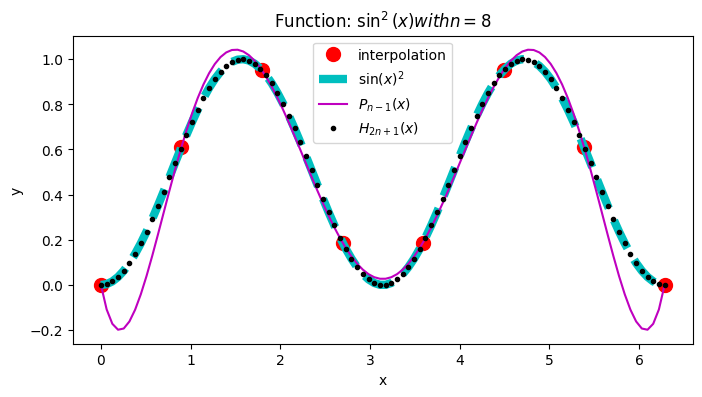

In [ ]:
plt.figure( figsize=(8,4) )
plt.plot(Xn,Yn,'ro',ms=10,label='interpolation')
plt.plot(x, np.sin(x)**2,'c--',lw=6,label='$\\sin(x)^2$')

plt.plot(x, Polynomial(poly.coef[::-1])(x), 'm-', label=r'$P_{n-1}(x)$')
plt.plot(x,yH, 'k.', label=r'$H_{2n+1}(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Function: $\\sin^2(x) with  n=%.d$'%N)
plt.legend()
plt.show()

In [ ]:
notas = (nota1 + nota2 + nota3 + nota4 + nota5)
nota = notas*5/100
print(notas, nota)

In [ ]:
P1 = 0
P3 = 5
P4 = 10
P5 = 15

In [ ]:
puntos = (P1 + P3 + P4 + P5)*(5/4)
nota = puntos*5/100
print('puntos:', puntos,'nota=', nota)

puntos: 37.5 nota= 1.875
